In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')
#data = df_train.append(df_test)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

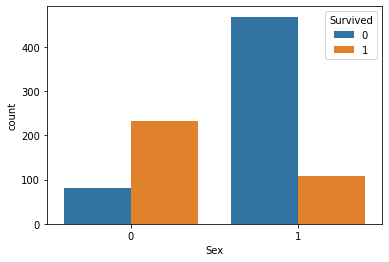

In [6]:
import matplotlib.pylab as plt
import seaborn as sns
df_train.Sex = df_train.Sex.replace('female',0)
df_train.Sex = df_train.Sex.replace('male',1)
df_train.head()
sns.countplot(x="Sex", hue="Survived", data=df_train)

In [7]:
df_train[(df_train.Survived == 1)].groupby('Sex').count().iloc[:1,1]
#0 = female
#1 = male

Sex
0    233
Name: Survived, dtype: int64

In [8]:
df_test.Sex = df_test.Sex.replace('female',0)
df_test.Sex = df_test.Sex.replace('male',1)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
y_train = df_train["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])
X_train

,Pclass,Sex,SibSp,Parch
0,3,1,1,0
1,1,0,1,0
2,3,0,0,0
3,1,0,1,0
4,3,1,0,0
...,...,...,...,...
886,2,1,0,0
887,1,0,0,0
888,3,0,1,2
889,1,1,0,0


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [11]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# GridsearchCV

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [13]:
pipe = Pipeline([("scale", StandardScaler()),
                ("model", KNeighborsRegressor(n_neighbors=1))
                ])
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [14]:
model = GridSearchCV(estimator=pipe,
             param_grid= {'model__n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, #it will present all the setting we would like to trogh on pipleine
             cv=3)

In [15]:
model.fit(X_train, y_train);
model.cv_results_ 

{'mean_fit_time': array([0.0044864 , 0.00384744, 0.00383377, 0.0037787 , 0.00377409,
        0.00386818, 0.00414356, 0.00401767, 0.00398437, 0.00407958]),
 'std_fit_time': array([9.69952113e-04, 1.19533786e-04, 9.75851642e-05, 9.99837432e-05,
        6.50797809e-05, 1.49362765e-04, 1.42258772e-04, 1.78296116e-04,
        1.02802437e-04, 1.44462511e-04]),
 'mean_score_time': array([0.00336083, 0.00313791, 0.00321086, 0.00341225, 0.00325298,
        0.00346605, 0.00374373, 0.00357286, 0.00355736, 0.00380349]),
 'std_score_time': array([3.25400360e-05, 1.11193636e-04, 5.89346851e-05, 2.11758652e-04,
        3.27152225e-05, 2.61930296e-05, 3.00269709e-04, 7.41238552e-05,
        4.41073655e-05, 2.88878587e-04]),
 'param_model__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__n_neighbors': 1},


In [16]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004486,0.000970,0.003361,0.000033,1,{'model__n_neighbors': 1},0.061148,0.080113,-0.265873,-0.041537,0.158818,10
1,0.003847,0.000120,0.003138,0.000111,2,{'model__n_neighbors': 2},0.017139,0.282625,0.185185,0.161650,0.109654,9
2,0.003834,0.000098,0.003211,0.000059,3,{'model__n_neighbors': 3},0.052998,0.363859,0.295121,0.237326,0.133326,8
3,0.003779,0.000100,0.003412,0.000212,4,{'model__n_neighbors': 4},0.195008,0.377017,0.372520,0.314848,0.084760,7
4,0.003774,0.000065,0.003253,0.000033,5,{'model__n_neighbors': 5},0.237769,0.373928,0.366190,0.325962,0.062442,6
5,0.003868,0.000149,0.003466,0.000026,6,{'model__n_neighbors': 6},0.289749,0.405811,0.390101,0.361887,0.051411,5
6,0.004144,0.000142,0.003744,0.000300,7,{'model__n_neighbors': 7},0.313524,0.388890,0.404924,0.369113,0.039848,2
7,0.004018,0.000178,0.003573,0.000074,8,{'model__n_neighbors': 8},0.308009,0.400400,0.400711,0.369707,0.043627,1
8,0.003984,0.000103,0.003557,0.000044,9,{'model__n_neighbors': 9},0.295680,0.409286,0.395535,0.366834,0.050626,4
9,0.004080,0.000144,0.003803,0.000289,10,{'model__n_neighbors': 10},0.294687,0.415116,0.392672,0.367492,0.052290,3


In [17]:
f"Shapes of X={X_train.shape} y={y_train.shape}, #Survived Cases={y_train.sum()}"

'Shapes of X=(891, 4) y=(891,), #Survived Cases=342'

In [18]:
mod = LogisticRegression(class_weight={0: 1, 1: 2}, max_iter=1000)
mod.fit(X_train, y_train).predict(X_train).sum()

430

In [19]:
grid = GridSearchCV(
    estimator = LogisticRegression(max_iter=1000),
    param_grid={'class_weight': [{0: 1, 1: v} for v in range(1, 4)]}, #setting to loop over
    cv=4,
    n_jobs=-1 #this grid search appear a paralel
)
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}]})

In [20]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012931,0.001016,0.002696,0.000227,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.807175,0.820628,0.784753,0.792793,0.801337,0.013732,1
1,0.010950,0.000883,0.002389,0.000114,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.730942,0.757848,0.739910,0.779279,0.751995,0.018493,2
2,0.010575,0.002475,0.001808,0.000371,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.726457,0.659193,0.748879,0.774775,0.727326,0.042892,3


In [21]:
from sklearn.metrics import precision_score, recall_score, make_scorer
#recall_score gives that did I get all the froud cases
#precision_score gives me that I predict froud ho accurate am i 
recall_score(y_train, grid.predict(X_train))

0.672514619883041

In [22]:
precision_score(y_train, grid.predict(X_train))

0.777027027027027

In [23]:
output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
